In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import requests
from PIL import Image
from io import BytesIO

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.models import Model

import os
import random
import shutil
import cv2
from tqdm import tqdm
from skimage.io import imread

In [4]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

X = []
Z = []

def assign_label(flower_type):
    if flower_type == 'daisy':
        return 1
    elif flower_type == 'dandelion':
        return 2
    elif flower_type == 'rose':
        return 3
    elif flower_type == 'sunflower':
        return 4
    elif flower_type == 'tulip':   
        return 0

inputdataset = "C:/Users/Aditya/Desktop/Colab Notebooks/project/flower_recognition/flowers"

for flower in os.listdir(inputdataset):
    flower_path = os.path.join(inputdataset, flower)  

    if not os.path.isdir(flower_path):  
        continue

    for filename in os.listdir(flower_path):
        img_path = os.path.join(flower_path, filename)  
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if img is None:  
            print(f"Warning: {img_path} could not be loaded.")
            continue

        img = cv2.resize(img, (224, 224))
        label = assign_label(flower)  
        X.append(np.array(img / 255))  
        Z.append(label)

X = np.array(X)
Z = np.array(Z)

Y = to_categorical(Z, 5)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3453, 224, 224, 3)
x_test shape:  (864, 224, 224, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


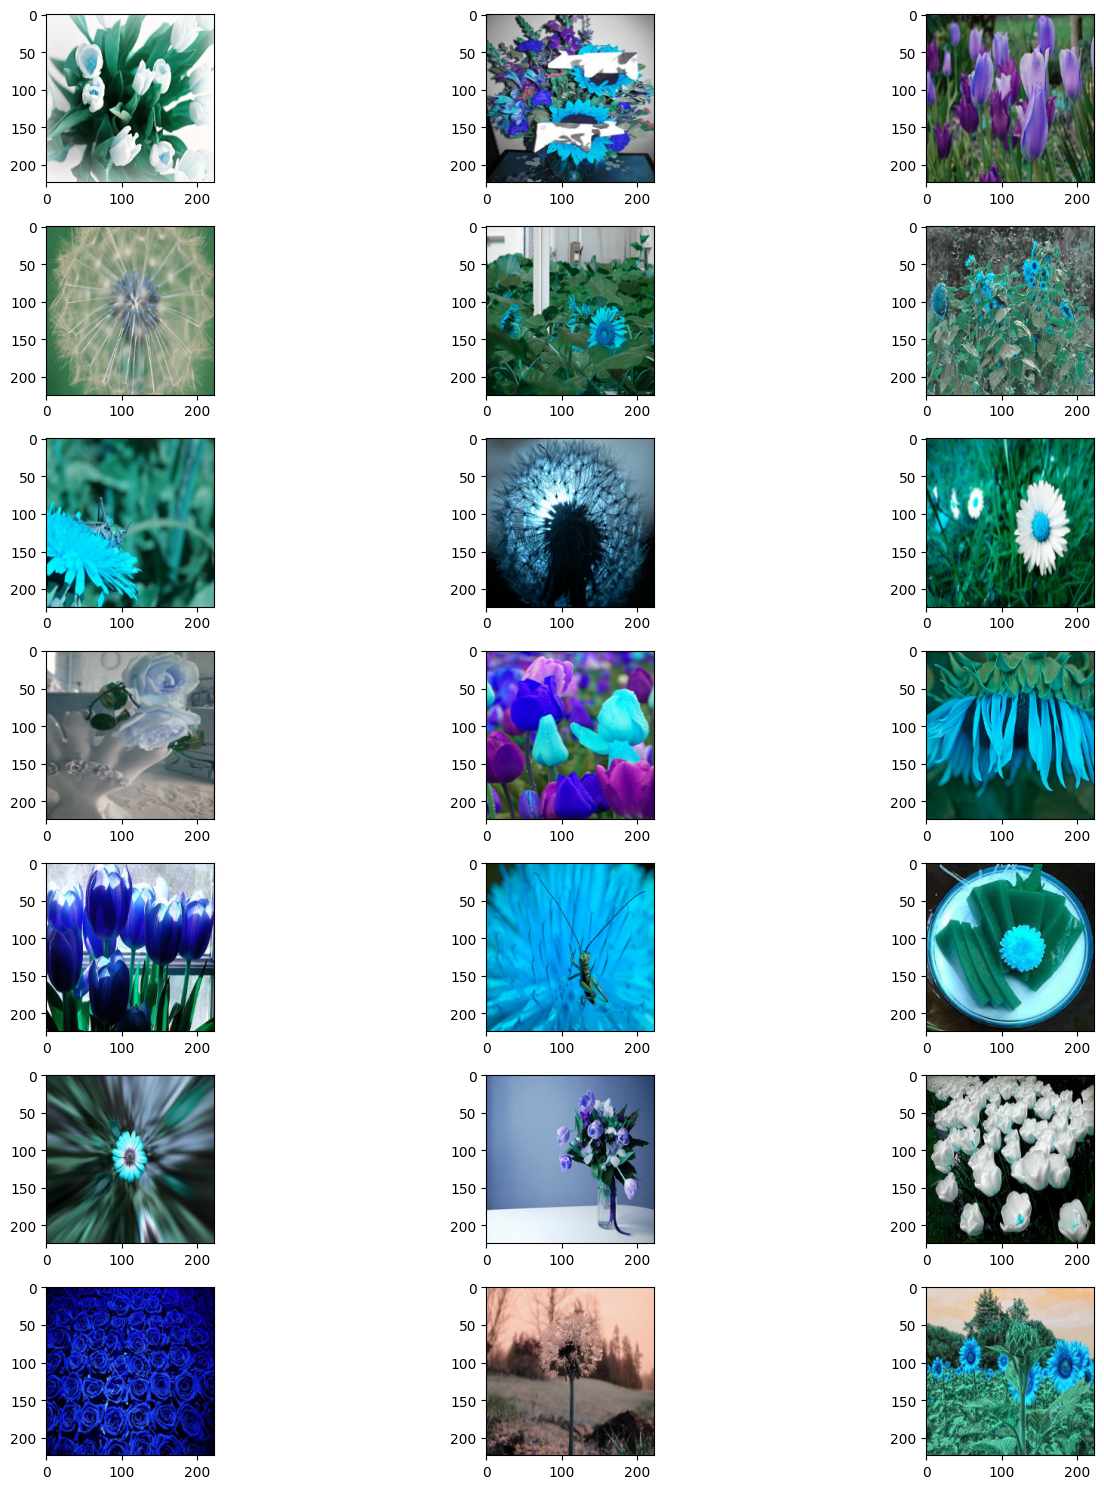

In [7]:
figure, axes = plt.subplots(7, 3)
figure.set_size_inches(15, 15)

for row in range(7):
    for col in range(3):
        index = random.randint(0, len(X) - 1)   

        image = X[index]
        flower_label = Z[index]        

        axes[row, col].imshow(image)
        # axes[row, col].set_title(f"Flower: {flower_label}")

plt.tight_layout()
plt.show()

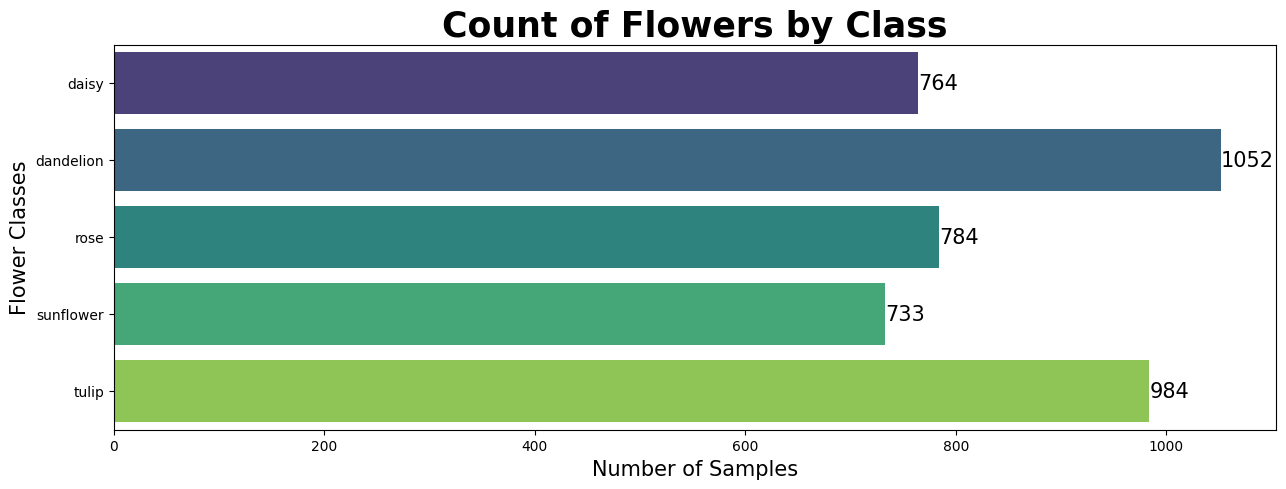

In [15]:
flower_counts = []

for flower_class in classes:
    class_path = os.path.join(inputdataset, flower_class)
    flower_counts.append(len(os.listdir(class_path)))

plt.figure(figsize=(15, 5))
bar_plot = sns.barplot(x=flower_counts, y=classes, palette="viridis")
bar_plot.bar_label(bar_plot.containers[0], fontsize=15)
bar_plot.bar_label(bar_plot.containers[1], fontsize=15)
bar_plot.bar_label(bar_plot.containers[2], fontsize=15)
bar_plot.bar_label(bar_plot.containers[3], fontsize=15)
bar_plot.bar_label(bar_plot.containers[4], fontsize=15)


plt.title("Count of Flowers by Class", fontsize=25, fontweight="bold")
plt.xlabel("Number of Samples", fontsize=15)
plt.ylabel("Flower Classes", fontsize=15)

plt.show()

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

In [17]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.25))

cnn_model.add(Dense(5, activation='softmax')) 

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
cnnmodel_history = cnn_model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                    epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 108s 966ms/step - accuracy: 0.4307 - loss: 1.3162 - val_accuracy: 0.4606 - val_loss: 1.4080
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 101s 911ms/step - accuracy: 0.5800 - loss: 1.0820 - val_accuracy: 0.6192 - val_loss: 0.9806
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 102s 927ms/step - accuracy: 0.5871 - loss: 1.0135 - val_accuracy: 0.6227 - val_loss: 0.9633
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 104s 952ms/step - accuracy: 0.6065 - loss: 0.9964 - val_accuracy: 0.6377 - val_loss: 0.9323
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 105s 956ms/step - accuracy: 0.6036 - loss: 0.9740 - val_accuracy: 0.6400 - val_loss: 0.9549
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 107s 969ms/step - accuracy: 0.6658 - loss: 0.9065 - val_accuracy: 0.6620 - val_loss: 0.8978
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 110s 1000ms/step - accuracy: 0.6689 - loss: 0.8671 - val_accuracy: 0.6782 - val_loss: 0.8797
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 106s 968ms/step - accuracy: 0.6677 

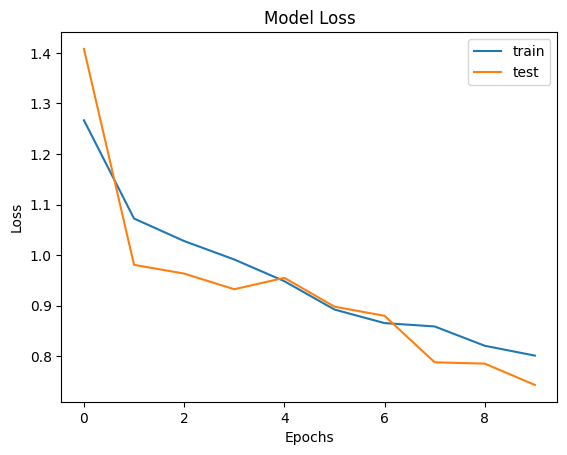

In [20]:
plt.plot(cnnmodel_history.history['loss'])
plt.plot(cnnmodel_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

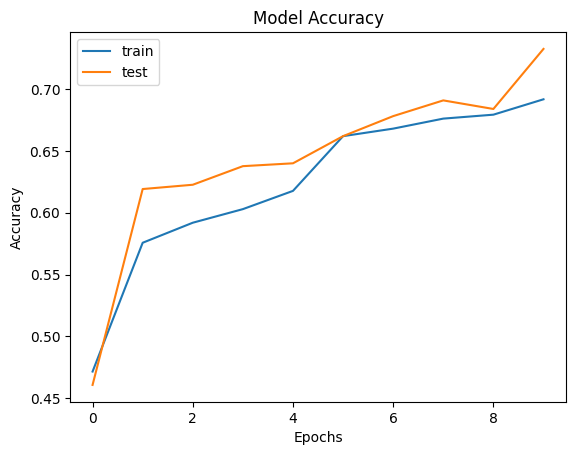

In [21]:
plt.plot(cnnmodel_history.history['accuracy'])
plt.plot(cnnmodel_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [22]:
loss, accuracy =cnn_model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = cnn_model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy:  0.7420
Testing Accuracy:  0.7326


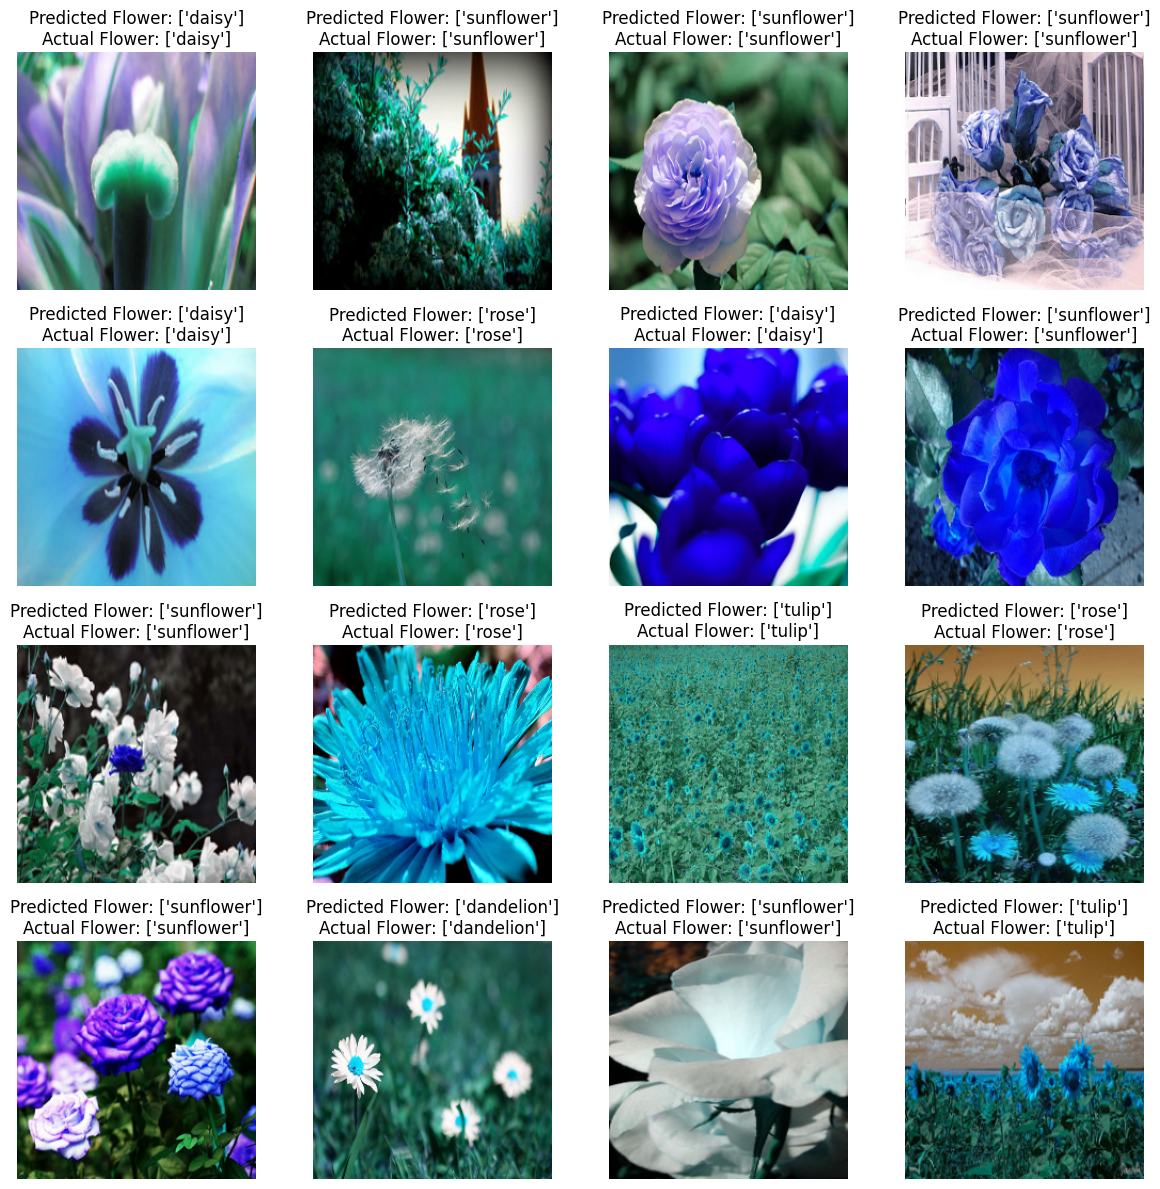

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have a list of class names
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Initialize and fit LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(classes)

# Assuming Y_pred_classes contains predicted class indices and Y_true contains true class indices
Y_pred_classes = np.argmax(y_test, axis=1)  # Example: getting predicted class indices
Y_true = np.argmax(y_test, axis=1)          # Example: getting true class indices

plt.figure(figsize=(12, 12))

for i in range(16):  
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i])  
    plt.title(
        "Predicted Flower: " + str(labelEncoder.inverse_transform([Y_pred_classes[i]])) + "\n" +
        "Actual Flower: " + str(labelEncoder.inverse_transform([Y_true[i]]))
    )
    plt.axis('off')

plt.tight_layout()
plt.show()
